# Задача 12

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style("darkgrid")

In [3]:
def rect(n, N):
    return 1 if (n >= 0 and n < N) else 0

In [4]:
def hann(n, N):
    return 0.5 * (1 - np.cos(2 * np.pi * n / (N - 1)))

In [5]:
def DFT(x, window):
    N = x.size
    omega = 2 * np.pi / N
    
    Fx = np.zeros_like(x, dtype=complex)
    
    for k in range(N):
        _sum = 0
        for n in range(N):
            _sum += x[n] * window(n - k, N) * np.exp(1j * omega * k * n)
        Fx[k] = _sum
    return Fx

In [23]:
a0 = 1
a1 = 0.002

w0 = 5.2
w1 = 5*w0

fs = 1000
n = 1000
T = 2 * np.pi * np.arange(n)/fs
hz = np.linspace(0, fs/2, n//2+1)

In [24]:
f = a0 * np.sin(w0 * T) + a1 * np.sin( w1 * T) + a0 * (np.sin(2100*T))

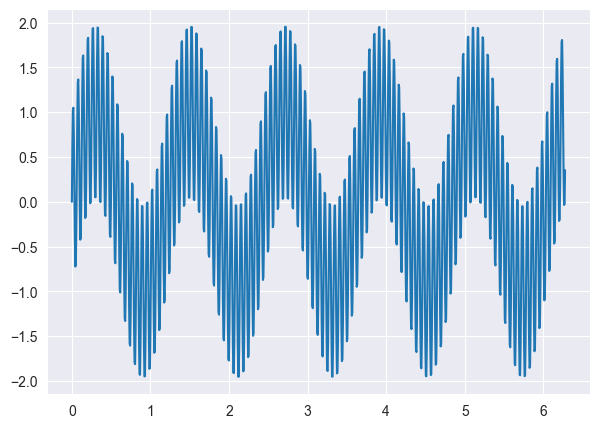

In [25]:
plt.figure(figsize=(7, 5), dpi=100)

plt.plot(T, f)

In [26]:
spectrum_rect = DFT(f, rect)
spectrum_hann = DFT(f, hann)

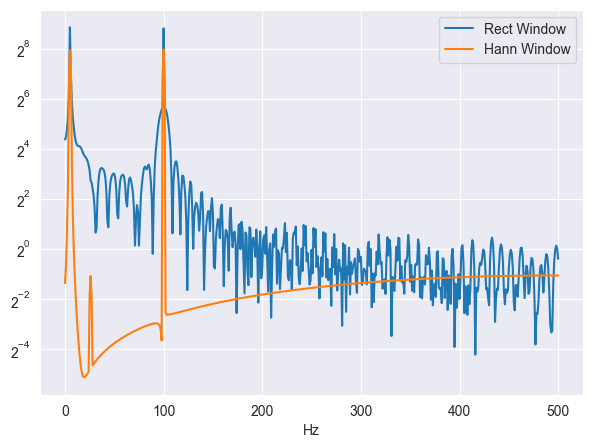

In [27]:
plt.figure(figsize=(7, 5), dpi=100)

plt.plot(hz, np.abs(spectrum_rect[:hz.size]), label='Rect Window')
plt.plot(hz, np.abs(spectrum_hann[:hz.size]), label='Hann Window')

# plt.xlim([0, max(w0, w1)*2])

plt.xlabel("Hz")

# plt.xscale('log' ,base=2)
plt.yscale('log' ,base=2)

plt.legend()

plt.show()